In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime, date, time

In [11]:
fc_tc = pd.read_csv("../Project/Source data/fc-tc-regionaux-mensuels-enr.csv",sep=';',engine='python',quotechar='"',encoding='utf-8')

In [12]:
fc_tc.head()

Mois  Code INSEE région                Région  \
0  2020-12                 53              Bretagne   
1  2020-12                 94                 Corse   
2  2020-12                 75    Nouvelle-Aquitaine   
3  2020-12                 84  Auvergne-Rhône-Alpes   
4  2020-12                 44             Grand Est   

   FC moyen mensuel hydraulique  FC moyen mensuel éolien  \
0                          26.6                     33.1   
1                          52.9                      8.9   
2                          36.1                     36.6   
3                          25.5                     33.3   
4                          33.3                     31.3   

   FC moyen mensuel solaire  TC moyen mensuel hydraulique  \
0                       4.3                           2.3   
1                       8.6                          37.2   
2                       4.5                          10.5   
3                       3.8                          34.5   
4                       3.1                          13.3   

   TC moyen mensuel éolien  TC moyen mensuel solaire  \
0                     10.9                       0.3   
1                      0.5                       4.1   
2                      7.1                       2.0   
3                      2.1                       0.5   
4                     21.0                       0.3   

   TC moyen mensuel bioénergies  \
0                           1.2   
1                           0.2   
2                           2.4   
3                           1.1   
4                           1.8   

                                    Géo-shape région  \
0  {"type": "MultiPolygon", "coordinates": [[[[-3...   
1  {"type": "Polygon", "coordinates": [[[8.679404...   
2  {"type": "MultiPolygon", "coordinates": [[[[-1...   
3  {"type": "Polygon", "coordinates": [[[2.281089...   
4  {"type": "Polygon", "coordinates": [[[3.414735...   

            Géo-point région  
0  48.177551218,-2.841488793  
1    42.151503519,9.10615502  
2   45.206826366,0.207571781  
3   45.514642202,4.536120182  
4   48.688976812,5.613113265

In [13]:
fc_tc.isna().sum()

Mois                            0
Code INSEE région               0
Région                          0
FC moyen mensuel hydraulique    0
FC moyen mensuel éolien         0
FC moyen mensuel solaire        0
TC moyen mensuel hydraulique    0
TC moyen mensuel éolien         0
TC moyen mensuel solaire        0
TC moyen mensuel bioénergies    0
Géo-shape région                0
Géo-point région                0
dtype: int64

In [14]:
fc_tc.describe()

Code INSEE région  FC moyen mensuel hydraulique  \
count        1092.000000                   1092.000000   
mean           53.307692                     26.601767   
std            27.304049                     14.998060   
min            11.000000                      0.200000   
25%            28.000000                     15.200000   
50%            52.000000                     25.400000   
75%            76.000000                     36.025000   
max            94.000000                     70.500000   

       FC moyen mensuel éolien  FC moyen mensuel solaire  \
count              1092.000000               1092.000000   
mean                 22.580128                 13.757692   
std                   9.446898                  6.344748   
min                  -0.100000                  1.200000   
25%                  15.600000                  8.075000   
50%                  20.800000                 14.700000   
75%                  29.100000                 18.800000   
max                  60.500000                 33.400000   

       TC moyen mensuel hydraulique  TC moyen mensuel éolien  \
count                   1092.000000              1092.000000   
mean                      10.920284                 5.785604   
std                       14.254460                 5.403769   
min                        0.000000                 0.000000   
25%                        0.137500                 1.300000   
50%                        2.900000                 4.800000   
75%                       18.300000                 8.525000   
max                       68.500000                39.800000   

       TC moyen mensuel solaire  TC moyen mensuel bioénergies  
count               1092.000000                   1092.000000  
mean                   2.709240                      1.428178  
std                    3.226425                      0.745825  
min                    0.000000                      0.050000  
25%                    0.490000                      0.990000  
50%                    1.600000                      1.300000  
75%                    3.400000                      1.700000  
max                   18.400000                      4.300000

In [15]:
df_fctc_treated = fc_tc.drop(columns=['Géo-shape région','Géo-point région','TC moyen mensuel bioénergies','Code INSEE région'])

In [16]:
df_fctc_treated.head()

Mois                Région  FC moyen mensuel hydraulique  \
0  2020-12              Bretagne                          26.6   
1  2020-12                 Corse                          52.9   
2  2020-12    Nouvelle-Aquitaine                          36.1   
3  2020-12  Auvergne-Rhône-Alpes                          25.5   
4  2020-12             Grand Est                          33.3   

   FC moyen mensuel éolien  FC moyen mensuel solaire  \
0                     33.1                       4.3   
1                      8.9                       8.6   
2                     36.6                       4.5   
3                     33.3                       3.8   
4                     31.3                       3.1   

   TC moyen mensuel hydraulique  TC moyen mensuel éolien  \
0                           2.3                     10.9   
1                          37.2                      0.5   
2                          10.5                      7.1   
3                          34.5                      2.1   
4                          13.3                     21.0   

   TC moyen mensuel solaire  
0                       0.3  
1                       4.1  
2                       2.0  
3                       0.5  
4                       0.3

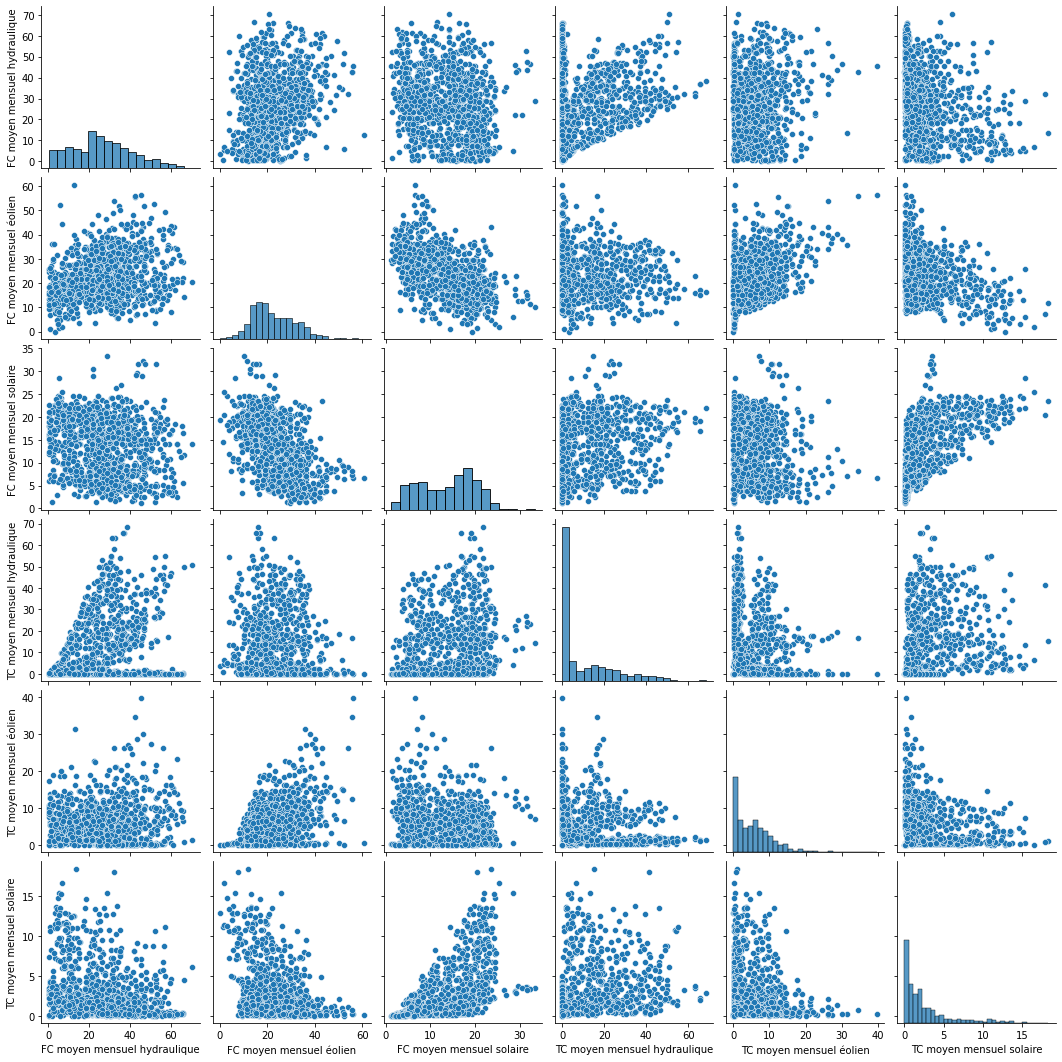

In [17]:
sns.pairplot(df_fctc_treated)

In [18]:
df_fctc_treated.describe()

FC moyen mensuel hydraulique  FC moyen mensuel éolien  \
count                   1092.000000              1092.000000   
mean                      26.601767                22.580128   
std                       14.998060                 9.446898   
min                        0.200000                -0.100000   
25%                       15.200000                15.600000   
50%                       25.400000                20.800000   
75%                       36.025000                29.100000   
max                       70.500000                60.500000   

       FC moyen mensuel solaire  TC moyen mensuel hydraulique  \
count               1092.000000                   1092.000000   
mean                  13.757692                     10.920284   
std                    6.344748                     14.254460   
min                    1.200000                      0.000000   
25%                    8.075000                      0.137500   
50%                   14.700000                      2.900000   
75%                   18.800000                     18.300000   
max                   33.400000                     68.500000   

       TC moyen mensuel éolien  TC moyen mensuel solaire  
count              1092.000000               1092.000000  
mean                  5.785604                  2.709240  
std                   5.403769                  3.226425  
min                   0.000000                  0.000000  
25%                   1.300000                  0.490000  
50%                   4.800000                  1.600000  
75%                   8.525000                  3.400000  
max                  39.800000                 18.400000

In [19]:
aggregate_functions2={'FC moyen mensuel éolien':'mean','TC moyen mensuel éolien':'mean'}
df_fctc_eolien=df_fctc_treated.groupby(['Région']).aggregate(aggregate_functions2)
df_fctc_eolien.head()

FC moyen mensuel éolien  TC moyen mensuel éolien
Région                                                                   
Auvergne-Rhône-Alpes                   23.753571                 1.476071
Bourgogne-Franche-Comté                23.007143                 5.300000
Bretagne                               20.934524                 7.577381
Centre-Val de Loire                    23.896429                11.210714
Corse                                  13.111905                 0.939762

In [20]:
aggregate_functions3={'FC moyen mensuel solaire':'mean','TC moyen mensuel solaire':'mean'}
df_fctc_solaire=df_fctc_treated.groupby(['Région']).aggregate(aggregate_functions3)
df_fctc_solaire.head()

FC moyen mensuel solaire  TC moyen mensuel solaire
Région                                                                     
Auvergne-Rhône-Alpes                    13.796429                  1.588095
Bourgogne-Franche-Comté                 13.626190                  1.420238
Bretagne                                12.300000                  1.083690
Centre-Val de Loire                     13.670238                  1.721190
Corse                                   16.048810                  8.445238

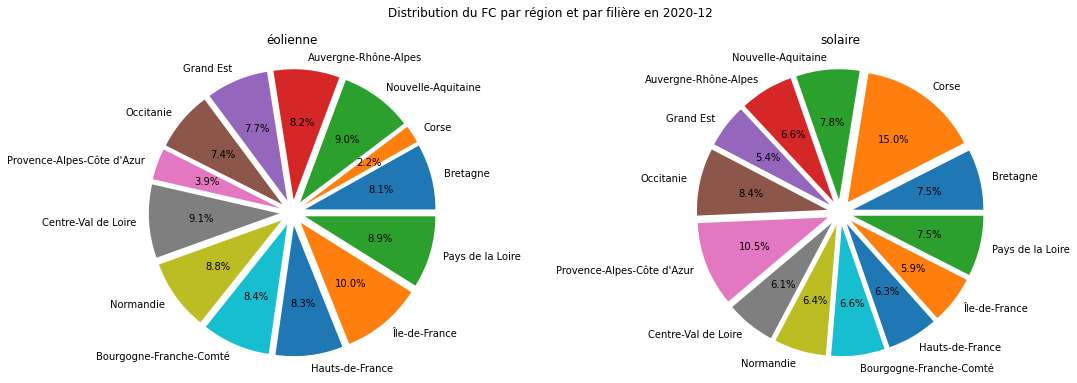

In [21]:
#Taux de couverture par région
for_plot = df_fctc_treated.loc[df_fctc_treated["Mois"] == '2020-12']

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=True,
                                    figsize=(18, 6))
labels = for_plot["Région"]

ax1.pie(for_plot["FC moyen mensuel éolien"],
        labels = labels,
        explode = [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1], 
        autopct = '%1.1f%%')
ax1.set_title('éolienne')

ax2.pie(for_plot["FC moyen mensuel solaire"],
        labels = labels,
        explode = [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1], 
        autopct = '%1.1f%%')
ax2.set_title('solaire')

fig.suptitle("Distribution du FC par région et par filière en 2020-12")
plt.show()

In [22]:
data = df_fctc_treated
fig = px.bar(
            data,
            x = ["FC moyen mensuel éolien","TC moyen mensuel éolien"],
            y = "Région",
            text = "value",
            animation_frame = "Mois",
            orientation = 'h',
            title = 'Comparaison FC/TC filière éolienne')
fig.show()

In [23]:
data = df_fctc_treated
fig = px.bar(
            data,
            x = ["FC moyen mensuel solaire","TC moyen mensuel solaire"],
            y = "Région",
            text = "value",
            animation_frame = "Mois",
            orientation = 'h',
            title = 'Comparaison FC/TC filière solaire')
fig.show()

In [24]:
data = df_fctc_treated.sort_values(["Mois","Région"], ascending=[True,False])
fig = px.bar(
            data,
            x = ["FC moyen mensuel éolien","FC moyen mensuel solaire"],
            y = "Région",
            text = "value",
            animation_frame = "Mois",
            orientation = 'h',
            title = 'Production par région (Solaire/éolien)')
fig.show()

In [25]:
data = df_fctc_treated.sort_values(["Mois","Région"], ascending=[True,False])
fig = px.bar(
            data,
            x = ["TC moyen mensuel éolien","TC moyen mensuel solaire"],
            y = "Région",
            text = "value",
            animation_frame = "Mois",
            orientation = 'h',
            title = 'TC par région')
fig.show()

In [26]:

fig = px.line(df_fctc_treated, x='Mois', y=["FC moyen mensuel solaire", "FC moyen mensuel éolien"],
              animation_frame = "Région",title = 'FC solaire/éolien par région au fil du temps')
fig.show()

In [27]:
fig = px.line(df_fctc_treated, x='Mois', y=["TC moyen mensuel solaire", "TC moyen mensuel éolien"],
              animation_frame = "Région",title = 'TC solaire/éolien par région au fil du temps')
fig.show()

<AxesSubplot:xlabel='Région'>

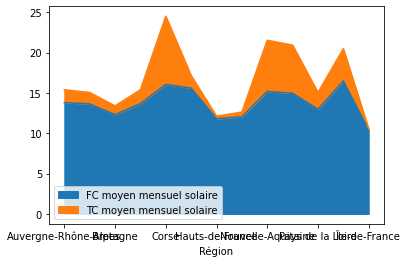

In [28]:
df_fctc_solaire.plot.area()

Ce graph est à finaliser => plotly pour une slider par Région ou par Mois pour mieux visualiser 

In [29]:
data = fc_tc.loc[fc_tc["Mois"] == '2020-12']
geodata = {'type':'FeatureCollection',
           'features': []}

 

for row in data.itertuples():
    region_code = row[3]
    coord = eval(row[11])
    temp_d = {}
    temp_d['type'] = 'Feature'
    temp_d['geometry'] = coord
    temp_d['id'] = region_code
    geodata['features'].append(temp_d)
    
fig = px.choropleth_mapbox(data, geojson = geodata, 
                           locations = 'Région', color = 'FC moyen mensuel éolien',
                           color_continuous_scale = "Viridis",
                           mapbox_style = "carto-positron",
                           zoom = 4.5, center = {"lat": 47, "lon": 1.7},opacity = 0.5)
fig.update_layout(margin = {"r":0,"t":0,"l":0,"b":0})
fig.show()

In [30]:
data = fc_tc.loc[fc_tc["Mois"] == '2020-12']
geodata = {'type':'FeatureCollection',
           'features': []}

 

for row in data.itertuples():
    region_code = row[3]
    coord = eval(row[11])
    temp_d = {}
    temp_d['type'] = 'Feature'
    temp_d['geometry'] = coord
    temp_d['id'] = region_code
    geodata['features'].append(temp_d)
    
fig = px.choropleth_mapbox(data, geojson = geodata, 
                           locations = 'Région', color = 'FC moyen mensuel solaire',
                           color_continuous_scale = "Viridis",
                           mapbox_style = "carto-positron",
                           zoom = 4.5, center = {"lat": 47, "lon": 1.7},opacity = 0.5)
fig.update_layout(margin = {"r":0,"t":0,"l":0,"b":0})
fig.show()